1. 일별 자전거 이용건수
2. 대여시간대별, 요일별 자전거 이용건수
3. 주말, 평일 이용건수
4. 인기명소

In [56]:
# 데이터 불러오기, 데이터 병합

import pandas as pd

bikes_t = {}

for i in range(1,4):
    bikes_t[i] = pd.read_csv(f'data\서울특별시 공공자전거 대여이력 정보_240{i}.csv', encoding='cp949')

In [57]:
for i in range(1,4):
    print(bikes_t[i].shape)

(2053893, 17)
(2101129, 17)
(3250056, 17)


In [58]:
bikes = pd.concat(bikes_t, ignore_index=True)
bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분
0,SPB-46712,2024-01-01 00:04:10,4804,동서울농협 앞,0,2024-01-01 00:05:13,01416,상봉역 3번출구,0,1,0.00,2002,M,내국인,ST-2630,ST-850,일반자전거
1,SPB-35089,2024-01-01 00:00:10,4169,신대방삼거리,0,2024-01-01 00:06:23,00251,서울지방병무청 버스정류장,0,6,1147.58,1993,NaN,내국인,ST-2654,ST-299,일반자전거
2,SPB-36386,2024-01-01 00:03:13,540,군자역 7번출구 베스트샵 앞,0,2024-01-01 00:06:33,03509,세종사이버대학교,0,3,642.13,2004,F,내국인,ST-253,ST-1194,일반자전거
3,SPB-61278,2024-01-01 00:02:42,1139,용문사 버스정류장,0,2024-01-01 00:07:24,00701,목동사거리 부근,0,4,830.00,\N,M,내국인,ST-533,ST-309,일반자전거
4,SPB-36848,2024-01-01 00:03:02,3416,동묘앞역 6번출구,0,2024-01-01 00:07:33,00346,맥스타일 앞,0,4,791.08,1995,M,내국인,ST-1813,ST-162,일반자전거


In [59]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7405078 entries, 0 to 7405077
Data columns (total 17 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     object 
 9   이용시간(분)   int64  
 10  이용거리(M)   float64
 11  생년        object 
 12  성별        object 
 13  이용자종류     object 
 14  대여대여소ID   object 
 15  반납대여소ID   object 
 16  자전거구분     object 
dtypes: float64(1), int64(3), object(13)
memory usage: 960.4+ MB


## 날짜 데이터 변경 : pd.to_datetime(변수명)
- dt 액세서 (날짜 데이터로 되어있을때 이용 가능)
    - 변수명.dt.year 
    - 변수명.dt.month
    - 변수명.dt.weekday (요일, 숫자로 0~6(월~일))
    - 변수명.dt.hour


In [60]:
# 일자별, 요일별, 주말구분별, 대여시간대별 따릉이 이용건수 파악
# 대여별, 일자, 요일, 대여시간대, 주말구분 컬럼 추가 

bikes['대여일'] = pd.to_datetime(bikes['대여일시'])
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7405078 entries, 0 to 7405077
Data columns (total 18 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      object        
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   대여거치대     int64         
 5   반납일시      object        
 6   반납대여소번호   object        
 7   반납대여소명    object        
 8   반납거치대     object        
 9   이용시간(분)   int64         
 10  이용거리(M)   float64       
 11  생년        object        
 12  성별        object        
 13  이용자종류     object        
 14  대여대여소ID   object        
 15  반납대여소ID   object        
 16  자전거구분     object        
 17  대여일       datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(13)
memory usage: 1016.9+ MB


In [61]:
# 월,일자,시간대 컬럼 추가

bikes['월'] = bikes['대여일'].dt.month
bikes['일자'] = bikes['대여일'].dt.day
bikes['시간대'] = bikes['대여일'].dt.hour

bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7405078 entries, 0 to 7405077
Data columns (total 21 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      object        
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   대여거치대     int64         
 5   반납일시      object        
 6   반납대여소번호   object        
 7   반납대여소명    object        
 8   반납거치대     object        
 9   이용시간(분)   int64         
 10  이용거리(M)   float64       
 11  생년        object        
 12  성별        object        
 13  이용자종류     object        
 14  대여대여소ID   object        
 15  반납대여소ID   object        
 16  자전거구분     object        
 17  대여일       datetime64[ns]
 18  월         int32         
 19  일자        int32         
 20  시간대       int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(3), object(13)
memory usage: 1.1+ GB


In [62]:
# 요일
bikes['요일_n'] = bikes['대여일'].dt.weekday
bikes['요일_n'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

In [63]:
bikes['요일_n'].value_counts().sort_index()

요일_n
0     977123
1    1088280
2    1173864
3    1147832
4    1146668
5     987407
6     883904
Name: count, dtype: int64

In [64]:
bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분,대여일,월,일자,시간대,요일_n
0,SPB-46712,2024-01-01 00:04:10,4804,동서울농협 앞,0,2024-01-01 00:05:13,01416,상봉역 3번출구,0,1,...,M,내국인,ST-2630,ST-850,일반자전거,2024-01-01 00:04:10,1,1,0,0
1,SPB-35089,2024-01-01 00:00:10,4169,신대방삼거리,0,2024-01-01 00:06:23,00251,서울지방병무청 버스정류장,0,6,...,NaN,내국인,ST-2654,ST-299,일반자전거,2024-01-01 00:00:10,1,1,0,0
2,SPB-36386,2024-01-01 00:03:13,540,군자역 7번출구 베스트샵 앞,0,2024-01-01 00:06:33,03509,세종사이버대학교,0,3,...,F,내국인,ST-253,ST-1194,일반자전거,2024-01-01 00:03:13,1,1,0,0
3,SPB-61278,2024-01-01 00:02:42,1139,용문사 버스정류장,0,2024-01-01 00:07:24,00701,목동사거리 부근,0,4,...,M,내국인,ST-533,ST-309,일반자전거,2024-01-01 00:02:42,1,1,0,0
4,SPB-36848,2024-01-01 00:03:02,3416,동묘앞역 6번출구,0,2024-01-01 00:07:33,00346,맥스타일 앞,0,4,...,M,내국인,ST-1813,ST-162,일반자전거,2024-01-01 00:03:02,1,1,0,0


In [65]:
weekdays = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
bikes['요일'] = bikes['요일_n'].map(weekdays)
bikes['요일'].unique()

array(['월', '화', '수', '목', '금', '토', '일'], dtype=object)

In [66]:
# 주말구분 열 생성

weekend = {'월':'평일','화':'평일','수':'평일','목':'평일','금':'평일','토':'주말','일':'주말'}
bikes['주말구분'] = bikes['요일'].map(weekend)
bikes['주말구분'].unique()

array(['평일', '주말'], dtype=object)

일자별 따릉이 이용건수

In [67]:
# 1월 일자별 대여현황

daily_ride_01 = bikes.query('월==1').groupby('일자',as_index=False)['자전거번호'].count()
daily_ride_01.head()

,일자,자전거번호
0,1,48927
1,2,89691
2,3,74474
3,4,93416
4,5,97979


<Axes: title={'center': '2024년 1월 일자별 현황'}, xlabel='일자', ylabel='자전거번호'>

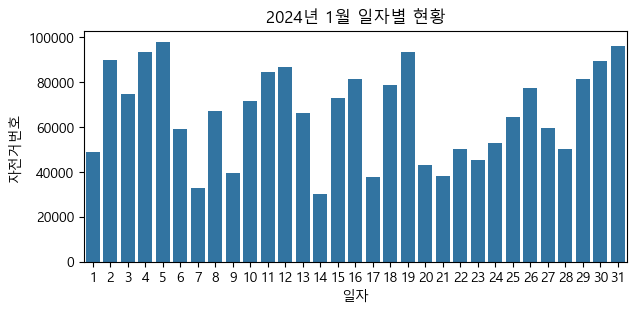

In [68]:
# 시각화

import seaborn as sns
import matplotlib.pyplot as plt 

plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(7,3))
plt.title('2024년 1월 일자별 현황')
sns.barplot(data=daily_ride_01, x='일자',y='자전거번호')

In [69]:
# 2월

daily_ride_02 = bikes.query('월==2').groupby('일자',as_index=False)['자전거번호'].count()

# 3월

daily_ride_03 = bikes.query('월==3').groupby('일자',as_index=False)['자전거번호'].count()

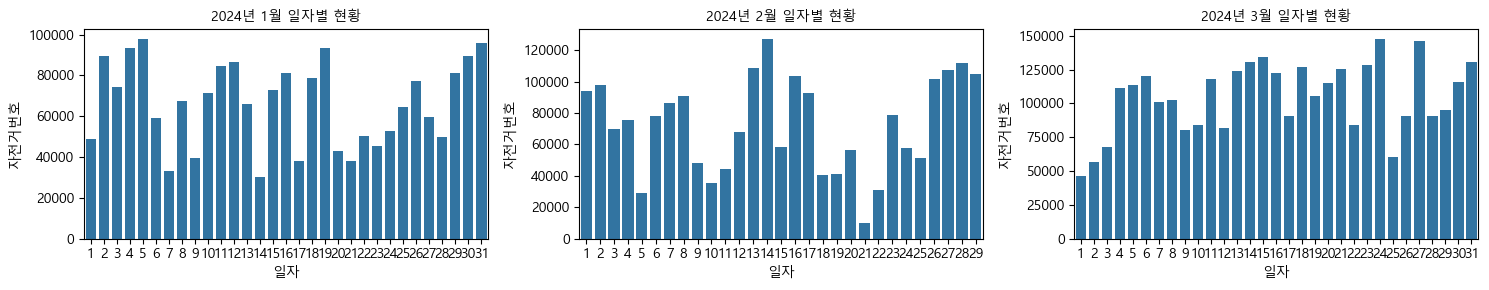

In [70]:
# 1,2,3월 --> subplot

fig, axes = plt.subplots(1,3,figsize=(15,3))

sns.barplot(data=daily_ride_01, x='일자',y='자전거번호',ax=axes[0])
axes[0].set_title('2024년 1월 일자별 현황', fontsize=10)

sns.barplot(data=daily_ride_02, x='일자',y='자전거번호',ax=axes[1])
axes[1].set_title('2024년 2월 일자별 현황', fontsize=10)

sns.barplot(data=daily_ride_03, x='일자',y='자전거번호',ax=axes[2])
axes[2].set_title('2024년 3월 일자별 현황', fontsize=10)

# 그래프 간 간격 조정
plt.tight_layout()
plt.show()

<Axes: title={'center': '2024년 대여시간대별 현황'}, xlabel='시간대', ylabel='자전거번호'>

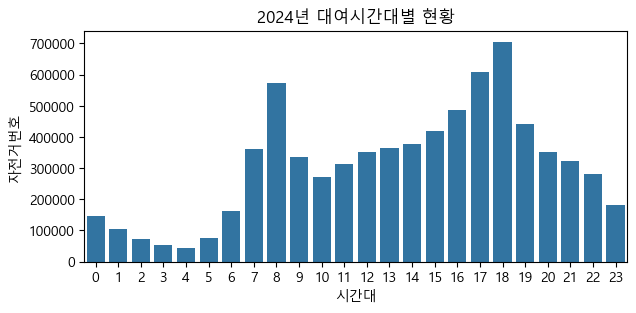

In [71]:
# 대여시간대별 따릉이 이용건수

hourly_ride = bikes.groupby('시간대', as_index=False)[['자전거번호']].count()

plt.figure(figsize=(7,3))
plt.title('2024년 대여시간대별 현황')
sns.barplot(data=hourly_ride, x='시간대',y='자전거번호')

<Axes: title={'center': '2024년 요일별 현황'}, xlabel='요일', ylabel='자전거번호'>

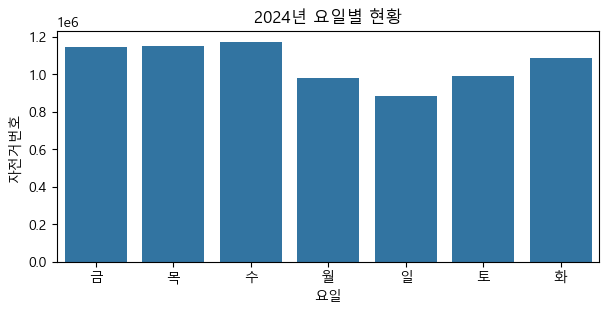

In [72]:
# 요일별 따릉이 인원수

day_ride = bikes.groupby('요일', as_index=False)[['자전거번호']].count()

plt.figure(figsize=(7,3))
plt.title('2024년 요일별 현황')
sns.barplot(data=day_ride, x='요일',y='자전거번호')

([<matplotlib.patches.Wedge at 0x1e91a1dac10>,
 [Text(0.771175933417397, 0.7844027535123819, '주말'),
  Text(-0.7711757245805579, -0.784402958827701, '평일')],
 [Text(0.42064141822767104, 0.42785604737039007, '25.27%'),
  Text(-0.4206413043166679, -0.4278561593605641, '74.73%')])

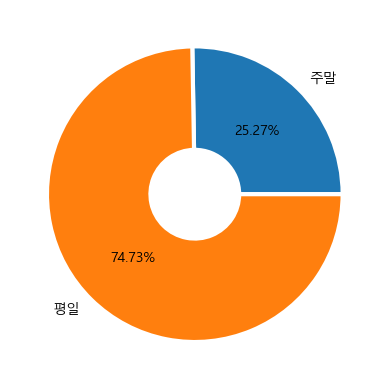

In [73]:
# 주말구분별 따릉이 인원수, 원그래프

weekend_ride = bikes.groupby('주말구분', as_index=False)[['자전거번호']].count()

plt.pie(weekend_ride['자전거번호'],labels=weekend_ride['주말구분'],autopct='%.2f%%', 
        wedgeprops={'width':0.7, 'edgecolor':'w', 'linewidth':3})

In [74]:
# 대여시간대별 & 요일별 이용건수

hourly_weekday_ride = bikes.groupby(['시간대','요일'],as_index=False)[['자전거번호']].count()
hourly_weekday_ride.head()

,시간대,요일,자전거번호
0,0,금,23351
1,0,목,20715
2,0,수,20657
3,0,월,15891
4,0,일,23361


<Axes: xlabel='시간대', ylabel='자전거번호'>

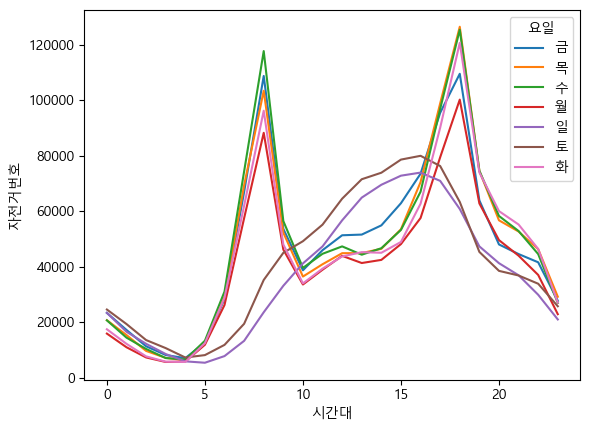

In [75]:
sns.lineplot(data=hourly_weekday_ride, x='시간대',y='자전거번호',hue='요일')

In [76]:
hourly_weekday_ride2 = bikes.pivot_table(index='시간대',columns='요일',values='자전거번호',aggfunc='count')

# 열순서 지정하여 재정렬
hourly_weekday_ride2= hourly_weekday_ride2.reindex(columns=['월','화','수','목','금','토','일'])

hourly_weekday_ride2.head()

요일,월,화,수,목,금,토,일
시간대,,,,,,,
0,15891,17445,20657,20715,23351,24562,23361
1,10968,12197,14435,15369,17204,19326,16545
2,7293,7679,10355,9649,11316,13558,12211
3,5661,5773,7070,7143,8168,10661,8525
4,5823,5667,6533,6301,7037,7268,5884


<Axes: xlabel='요일', ylabel='시간대'>

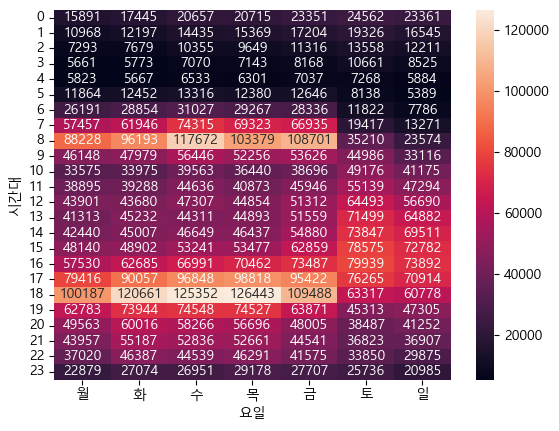

In [77]:
plt.Figure(figsize=(8,8))
sns.heatmap(data=hourly_weekday_ride2, annot=True, fmt='d')

In [78]:
hourly_weekday_ride3 = bikes.groupby(['시간대','요일'])[['자전거번호']].count().unstack()
hourly_weekday_ride3

자전거번호                                              
요일        금       목       수       월      일      토       화
시간대                                                      
0     23351   20715   20657   15891  23361  24562   17445
1     17204   15369   14435   10968  16545  19326   12197
2     11316    9649   10355    7293  12211  13558    7679
3      8168    7143    7070    5661   8525  10661    5773
4      7037    6301    6533    5823   5884   7268    5667
5     12646   12380   13316   11864   5389   8138   12452
6     28336   29267   31027   26191   7786  11822   28854
7     66935   69323   74315   57457  13271  19417   61946
8    108701  103379  117672   88228  23574  35210   96193
9     53626   52256   56446   46148  33116  44986   47979
10    38696   36440   39563   33575  41175  49176   33975
11    45946   40873   44636   38895  47294  55139   39288
12    51312   44854   47307   43901  56690  64493   43680
13    51559   44893   44311   41313  64882  71499   45232
14    54880   46437   46649   42440  69511  73847   45007
15    62859   53477   53241   48140  72782  78575   48902
16    73487   70462   66991   57530  73892  79939   62685
17    95422   98818   96848   79416  70914  76265   90057
18   109488  126443  125352  100187  60778  63317  120661
19    63871   74527   74548   62783  47305  45313   73944
20    48005   56696   58266   49563  41252  38487   60016
21    44541   52661   52836   43957  36907  36823   55187
22    41575   46291   44539   37020  29875  33850   46387
23    27707   29178   26951   22879  20985  25736   27074

인기 있는 대여소 TOP 50 (평일/주말 구분)

In [79]:
# 주말 인기대여소

bikes_weekend = bikes.groupby(['대여 대여소번호', '대여 대여소명', '주말구분'])['자전거번호'].count().unstack()
bikes_weekend.head()

,주말구분,주말,평일
대여 대여소번호,대여 대여소명,,
102,망원역 1번출구 앞,1794.0,4485.0
103,망원역 2번출구 앞,1609.0,3149.0
104,합정역 1번출구 앞,976.0,2826.0
105,합정역 5번출구 앞,740.0,1662.0
106,합정역 7번출구 앞,1975.0,2915.0


In [80]:
weekend50 = bikes_weekend.sort_values('주말', ascending=False).head(50).reset_index()
weekend50

주말구분,대여 대여소번호,대여 대여소명,주말,평일
0,4217,한강공원 망원나들목,9011.0,8691.0
1,502,자양(뚝섬한강공원)역 1번출구 앞,7992.0,11407.0
2,2715,마곡나루역 2번 출구,6274.0,26543.0
3,1210,롯데월드타워(잠실역2번출구 쪽),5606.0,13241.0
4,207,여의나루역 1번출구 앞,5410.0,8141.0
5,2102,봉림교 교통섬,4907.0,9522.0
6,1153,"발산역 1번, 9번 인근 대여소",4410.0,14136.0
7,2622,올림픽공원역 3번출구,4095.0,7354.0
8,3533,건대입구역 사거리(롯데백화점),3872.0,8539.0
9,2608,송파구청,3836.0,9732.0


In [81]:
bike_shop = pd.read_csv('data\대여소 정보.csv', encoding='cp949')
bike_shop.head()

,대여소 번호,보관소(대여소)명,자치구,상세주소,위도,경도
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978332
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100


In [102]:
weekend50_total = pd.merge(weekend50, bike_shop, left_on='대여 대여소번호', right_on='대여소 번호')
weekend50_total

,대여 대여소번호,대여 대여소명,주말,평일,대여소 번호,보관소(대여소)명,자치구,상세주소,위도,경도
0,4217,한강공원 망원나들목,9011.0,8691.0,4217,한강공원 망원나들목,마포구,마포구 망원동 462-8,37.555576,126.896889
1,502,자양(뚝섬한강공원)역 1번출구 앞,7992.0,11407.0,502,뚝섬유원지역 1번출구 앞,광진구,서울특별시 광진구 능동로 10 뚝섬유원지역 1번출구 앞,37.531860,127.067192
2,2715,마곡나루역 2번 출구,6274.0,26543.0,2715,마곡나루역 2번 출구,강서구,강서구 마곡중앙5로 6,37.566925,126.827438
3,1210,롯데월드타워(잠실역2번출구 쪽),5606.0,13241.0,1210,롯데월드타워(잠실역2번출구 쪽),송파구,서울특별시 송파구 올림픽로 293-19,37.513126,127.100960
4,207,여의나루역 1번출구 앞,5410.0,8141.0,207,여의나루역 1번출구 앞,영등포구,서울특별시 영등포구 여의동로 지하343,37.527157,126.931900
5,2102,봉림교 교통섬,4907.0,9522.0,2102,봉림교 교통섬,관악구,서울특별시 관악구 관천로 52,37.484085,126.926888
6,1153,"발산역 1번, 9번 인근 대여소",4410.0,14136.0,1153,"발산역 1번, 9번 인근 대여소",강서구,서울특별시 강서구 공항대로 281,37.558949,126.837174
7,2622,올림픽공원역 3번출구,4095.0,7354.0,2622,올림픽공원역 3번출구,송파구,송파구 방이동 89-28,37.516258,127.130592
8,3533,건대입구역 사거리(롯데백화점),3872.0,8539.0,3533,건대입구역 사거리(롯데백화점),광진구,서울특별시 광진구 능동로 92 건대입구역 사거리(롯데백화점),37.539139,127.070618
9,2608,송파구청,3836.0,9732.0,2608,송파구청,송파구,송파구 올림픽로 326,37.515053,127.106270


<Axes: ylabel='자치구'>

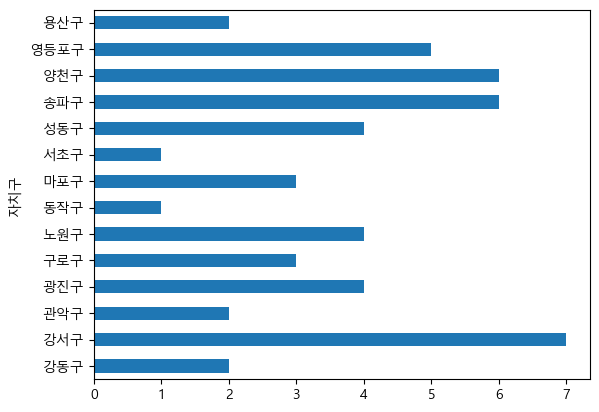

In [83]:
# 자치구별 상위 50개 대여소 분포 

weekend50_total = weekend50_total.groupby('자치구')['대여 대여소번호'].count()
weekend50_total.plot(kind='barh')

In [107]:
import folium
from folium.plugins import MarkerCluster

map = folium.Map(location=[weekend50_total['위도'].mean(), weekend50_total['경도'].mean()],
           zoom_start=12, width=800, height=500)

marker = MarkerCluster().add_to(map)

for i in weekend50_total.index:
    sub_lat = weekend50_total.loc[i, '위도']
    sub_lon = weekend50_total.loc[i, '경도']
    shop = [sub_lat, sub_lon]
    sub_name = weekend50_total.loc[i, '대여 대여소명']
    folium.Marker(location=shop, popup=sub_name, icon=folium.Icon(color='red',icon='star')).add_to(marker)

map.save('map.html')
map